## Built-in Linear Regression Function

In [3]:
from plotnine import *
import pandas as pd
from sklearn.linear_model import LinearRegression # get linear regression function
import numpy as np

### Create data for fitting the model

In [18]:
x = [3,7,4,1,5,1,8] # hours of study
y = [7,10,6,4,8,10,2] # test score
df = pd.DataFrame(list(zip(x,y)), 
               columns =['x', 'y']) 
df

,x,y
0,3,7
1,7,10
2,4,6
3,1,4
4,5,8
5,1,10
6,8,2


### Initialize the Linear Regression model

In [19]:
lm = LinearRegression()

### After initializing, we use the fit function that takes our independent and dependent variables to get the best-fit line

In [ ]:
#lm.fit(independent variable, dependent variable)

### The function takes a very specific type of inputs for x and y variables

In [6]:
lm.fit(df['x'],df['y'])

ValueError: Expected 2D array, got 1D array instead:
array=[3 7 4 1 5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [20]:
observed_x = df['x'].values.reshape(-1,1)
observed_y = df['y'].values.reshape(-1,1)

lm.fit(observed_x,observed_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### To get the parameters (b0 and b1) for the fitted model, we use the following commands

In [21]:
print(lm.coef_,lm.intercept_)

[[-0.21656051]] [7.61146497]


### Printing what the equation of the best-fit line looks like

In [22]:
print("The equation of the line is:")
print("y = ",lm.intercept_[0],"+",lm.coef_[0][0],"x")

The equation of the line is:
y =  7.611464968152866 + -0.21656050955414008 x


### Let's also see what the model predicts our test scores should be for the given data set
### We use the predict function for that

In [23]:
predicted_y = lm.predict(observed_x)
predicted_y

array([[6.96178344],
       [6.0955414 ],
       [6.74522293],
       [7.39490446],
       [6.52866242],
       [7.39490446],
       [5.87898089]])

### To get the R-squared value, we use the score function

In [24]:
from sklearn.metrics import r2_score
r2_score(observed_y,predicted_y)

0.03937463810075281

### We can make a new data frame with x,y, and predicted y (y-hat) values

In [25]:
df = pd.DataFrame(list(zip(observed_x[:, 0],observed_y[:, 0],predicted_y[:, 0])), 
               columns =['x', 'y','y_hat']) 
df



,x,y,y_hat
0,3,7,6.961783
1,7,10,6.095541
2,4,6,6.745223
3,1,4,7.394904
4,5,8,6.528662
5,1,10,7.394904
6,8,2,5.878981


### And plot the data with our predicted values

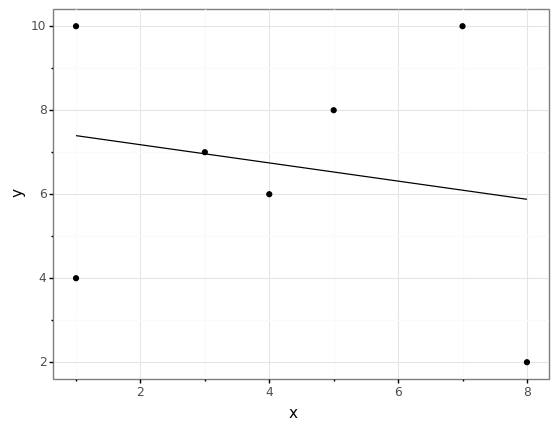

<ggplot: (-9223371895635714044)>

In [26]:
(
    ggplot(df,aes(x='x',y='y'))
    +geom_point()+geom_line(aes(y='y_hat'))
    +theme_bw()
)

### Q. What will happen when we introduce outliers in the data?

### Let's run a quick example using another data set
### We first load the data and see the underlying relationships

In [27]:
d = pd.read_csv("advertising.csv")
d.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


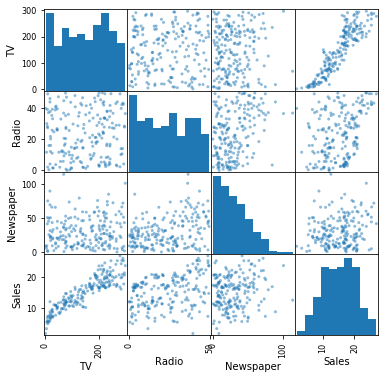

In [29]:
from pandas.plotting import scatter_matrix
scatter_matrix(d, figsize=(6, 6));

### Code to run Simple Linear Regression 

In [35]:
lm = LinearRegression()

observed_x = d['TV'].values.reshape(-1,1)
observed_y = d['Sales'].values.reshape(-1,1)

lm.fit(observed_x,observed_y)

d['pred'] = lm.predict(observed_x)
d.head()

,TV,Radio,Newspaper,Sales,pred
0,230.1,37.8,69.2,22.1,19.737265
1,44.5,39.3,45.1,10.4,9.443004
2,17.2,45.9,69.3,12.0,7.928816
3,151.5,41.3,58.5,16.5,15.377734
4,180.8,10.8,58.4,17.9,17.002852


### Code to plot data and fitted line

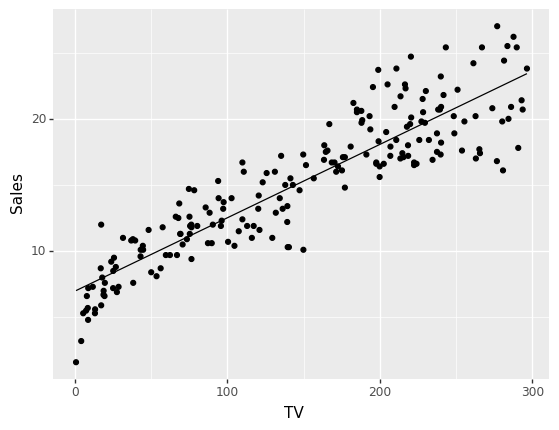

<ggplot: (-9223371895633889052)>

In [38]:
ggplot(d,aes(x='TV',y='Sales'))+geom_point()+geom_line(aes(y='pred'))

## Validation

#### Let's use a built-in dataset from the sk-learn library

In [39]:
from sklearn import datasets

#### We can now load in a data using the load_x function

In [40]:
diabetes = datasets.load_diabetes()

In [41]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

#### The diabetes data set isn't a data frame, just an array of more arrays

In [43]:
diabetes.values() # independent variables
diabetes.target # dependent variable

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

#### We first convert it into a data frame 

In [44]:
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # specify columns
df = pd.DataFrame(diabetes.data, columns=columns)
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


#### Note that the target variable is not included in this data frame, we store it separately

In [47]:
y = diabetes.target

#### We use the train_test_split function to split our data into training and testing sets

In [49]:
from sklearn.model_selection import train_test_split

#### Now we can split our data into a training set of x,y and a testing set of x,y variables

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


#### Let's apply a multiple linear regression model using all independent variables

#### We will fit the linear regression model using X_train and y_train but predict the values of X_test

In [51]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
predictions[0:5]

array([156.56918172, 152.21682213, 176.99693665,  89.56380433,
       157.46235593])

#### We can also compute the R-squared value

In [52]:
print(r2_score(y_test,predictions))

0.4789542737326089


#### Q. Is this a good model?

#### How about we use a single independent variable to make our model?

#### But which variable do we select?

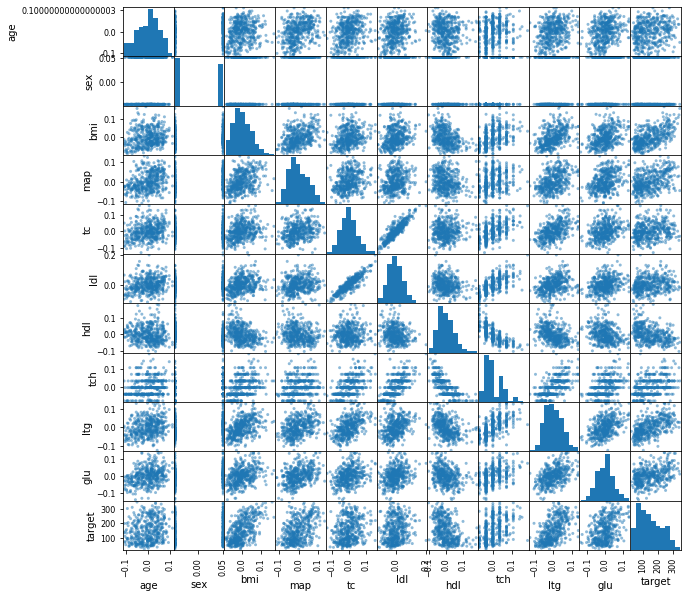

In [57]:
# make target part of the data 
df['target'] = diabetes.target
scatter_matrix(df,figsize=(10,10));

In [59]:
# code to check something
subset = df[['ltg','hdl','target']]
subset

,ltg,hdl,target
0,0.019908,-0.043401,151.0
1,-0.068330,0.074412,75.0
2,0.002864,-0.032356,141.0
3,0.022692,-0.036038,206.0
4,-0.031991,0.008142,135.0
...,...,...,...
437,0.031193,-0.028674,178.0
438,-0.018118,-0.028674,104.0
439,-0.046879,-0.024993,132.0
440,0.044528,-0.028674,220.0


In [60]:
# run linear regression
lm = LinearRegression()

In [62]:
lm.fit(subset[['ltg','hdl']],df['target'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
lm.coef_,lm.intercept_

(array([[ 786.30544863, -325.74200898]]), array([152.13348416]))